In [18]:
import pandas as pd
stuPer = pd.read_csv("StudentsPerformance.csv")
stuPer.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

## Shaping and splitting the data

In [20]:
stuPer.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values so we can go to the next step splitting the data in two sets.

In [21]:
stuPer_train, stuPer_test = train_test_split(stuPer, test_size=0.3, stratify=stuPer['test preparation course'], random_state=42)
print(stuPer_train.shape, stuPer_test.shape)

(700, 8) (300, 8)


## Evaluating the model

In [53]:
features= ['math score', 'writing score']
dt_regression = DecisionTreeRegressor(max_depth = 5)
dt_regression.fit(stuPer_train[features], stuPer_train['reading score'])

DecisionTreeRegressor(max_depth=5)

In [54]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree_stuPer_regression_reading_score")

    # Display in the notebook
    return graph

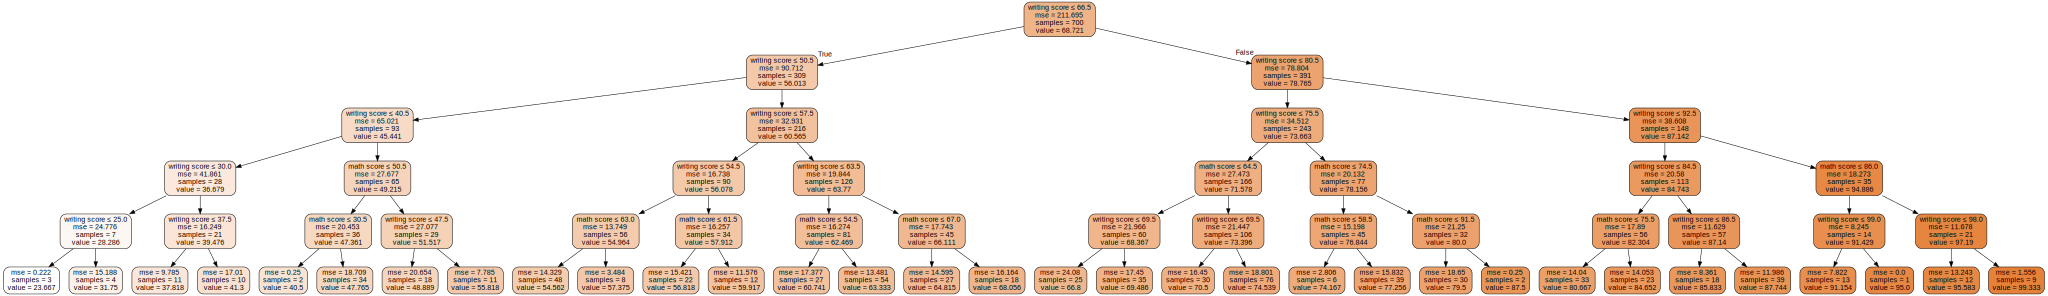

In [55]:
plot_tree_regression(dt_regression, features)

## Testing the model

In [56]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [57]:
predictionsOnTrainset = dt_regression.predict(stuPer_train[features])
predictionsOnTestset = dt_regression.predict(stuPer_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, stuPer_train['reading score'])
rmseTest = calculate_rmse(predictionsOnTestset, stuPer_test['reading score'])

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 3.87625641929926
RMSE on test set 4.732251524364329


The RMSE on our test set is higher because of overfitting, it sometimes finds things it bases it's conlusion on that aren't real relations that it can use because those only happen in our training set. When confronted with a new dataset those things won't happen anymore so it can't base it's decision on those things and it maybe gives some wrong answers because it thinks it can split it based on a wrong property. Apparently the reading score is quite related to math and writing scores which makes sense to us humans but the data shows that too.